クラスター数が既知でサンプル数1万以下であればkMeansを利用するが（サンプル数が1万以上であればMinibatch kMeans）、機能しない場合はスペクトラルクラスタリングを実施する

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用
from sklearn import datasets #使用するデータ

In [2]:
# moon型のデータを読み込む--------------------------------
X,z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

In [3]:
# データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

<function matplotlib.pyplot.show>

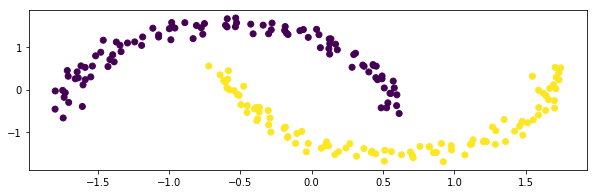

In [4]:
# プロットしてみる------------------------------------------
%matplotlib inline
 
x=X_norm[:,0]
y=X_norm[:,1]
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(x,y, c=z)
plt.show

### 一旦、Kmeansを実施

<function matplotlib.pyplot.show>

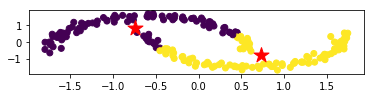

In [5]:
# KMeansを実施---------------------------------
km=cluster.KMeans(n_clusters=2)
z_km=km.fit(X_norm)
 
# 結果をプロット-----------------------------------------------
plt.subplot(3, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show

### SpectralClusteringを実施

affinity（親和性）をnearest_neighborsと設定。  
affinityとはSpectralClusteringを実施する途中で、サンプルデータをグラフ行列に書き換えているが、そのグラフの作り方を設定している。  
ここでは、近いデータとつながるグラフを作成する。

/opt/conda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<function matplotlib.pyplot.show>

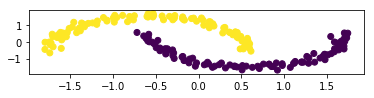

In [6]:
# SpectralClusteringを実施---------------------------------
km=cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors") # 'nearest_neighbors','precomputed','rbf'
z_km=km.fit(X_norm)
 
# 結果をプロット-----------------------------------------------
plt.subplot(3, 1, 3)
plt.scatter(x,y, c=z_km.labels_)
plt.show

### SpectralClusteringとは
 - [SpectralClustering:sklearn](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering)
 - [SpectralClustering:sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)
 - [理論](https://www.slideshare.net/pecorarista/ss-51761860)

SpectralClusteringは教師なし学習の一種で、データを自動的にクラスターに分ける。

スペクトルというと、光をプリズムで7色に分解した光スペクトルや、音や信号を周波数で分解した周波数スペクトルといった言葉が一般的であるが、SpectralClusteringのスペクトルはもう少し抽象的で広い意味を持つ。

ここでのスペクトルはスペクトル分解のことで、スペクトル分解とはデータを基底ベクトルの線形和で表現することを意味する。  
基本的には、「固有値と固有ベクトルで固有値分解する」という認識で問題ない。  
つまりスペクトル分解とはおおざっぱには固有値分解のことになる。

対象の行列は、元データをグラフ行列にした行列で、これをスペクトル分解する。

グラフ行列の意味合いは、サンプルデータM個がそれぞれどのように関連しているかを示す[M×M]の行列である。  
その関連を決めるのがaffinityでの設定で、上記コードでは近い点とはつながっているということにしている。

M個のサンプルが1つの行列で表されたものをグラフ行列と呼び、
このグラフ行列をクラスター数で、分割する（Ncut）。

今回の場合は2つのグラフになるようにグラフ行列を加工する。  
こうして加工された[M×M]行列を固有値分解（スペクトル分解）し、固有ベクトルをクラスター数分だけ結合した行列を作成する。

今回は[M×2]の行列となる（2はクラスター数を2としたため）。
本記事の場合、元データがx,yの2次元だったので次元圧縮になっていないが、もし元データの次元が3以上だった場合には、次元圧縮されたことになる。

そして導出された[M×2]の固有値ベクトル行列に、KMeansでクラスタリングを行う。

ここまでで分かったように、グラフ行列は一種の主成分分析を行い、分類しやすさを解析しているような働きがあり、スペクトル分解は次元圧縮の役割を果たしていると思うことができる。